<a href="https://colab.research.google.com/github/mandar-gite/Jupyter-algorithm/blob/master/Assignment_121_yeast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center>
    <img src="https://www.bits-pilani.ac.in/Uploads/Campus/BITS_university_logo.gif" alt="Institute Logo">
</center>

<center><h1><b>Work Integrated Learning Programmes Division M.Tech(AIML)</b></h1></center>
<center><h2><b>Machine Learning</b></h2></center>
<center><h3><b>S2-22_AIMLCZG565</b></h3></center>
<center><h4><b>Assignment 1 – PS-3</b></h4></center>

 ## Group No 121

### **Group Members:**

- Mandar Gite - 60%
- Roshni Ghosh - 40%
- Avishek Ghosh - 0% (No contributions in the assignment)

### **DATASET: YEAST**


<h3>SECTION 1: Import Libararies / Dataset</h3>

### <font style="color: teal;"><h3>Import Liabraries</h3></font>


In [ ]:
# Upgrade pip package manager
!pip install --upgrade pip


In [ ]:
!pip install -U scikit-learn
!pip install imbalanced-learn

In [ ]:

!pip install imbalanced-learn==0.8.0



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
#Liabraries for data handling
import numpy as np  # Import the NumPy library for numerical computations
import pandas as pd  # Import the Pandas library for data manipulation and analysis
import matplotlib.pyplot as plt  # Import the Matplotlib library for data visualization
import seaborn as sns  # Import the Seaborn library for statistical visualization
import gdown # Import the gdown libarary to import the dataset from Google Drive


#Liabraries for data prep

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import label_binarize

#liabraries for regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


#liabraries for performance evalauation
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report



### <font><h3> Downlaod Dataset</h3></font>

In [ ]:

# Define the URL of the CSV file in  Google Drive
url = 'https://drive.google.com/uc?id=13e--QYXVbTUed650YYF3mRKnnivdUakE'

# Download the file using gdown
gdown.download(url, 'data.csv')

#'https://drive.google.com/file/d/13e--QYXVbTUed650YYF3mRKnnivdUakE/view?usp=sharing'

Downloading...
From: https://drive.google.com/uc?id=13e--QYXVbTUed650YYF3mRKnnivdUakE
To: /content/data.csv
100%|██████████| 60.1k/60.1k [00:00<00:00, 8.98MB/s]


'data.csv'

### <font style="color: teal;"><h3>Import DataSet</h3></font>

In [ ]:
# Importing the dataset
df = pd.read_csv("data.csv")


### <h3>Data Visualization and Exploration</h3>

In [ ]:
df.shape

(1484, 9)

In [ ]:
df.head(5)

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     1484 non-null   float64
 1   gvh     1484 non-null   float64
 2   alm     1484 non-null   float64
 3   mit     1484 non-null   float64
 4   erl     1484 non-null   float64
 5   pox     1484 non-null   float64
 6   vac     1484 non-null   float64
 7   nuc     1484 non-null   float64
 8   name    1484 non-null   object 
dtypes: float64(8), object(1)
memory usage: 104.5+ KB


In [ ]:
df.columns


Index(['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'name'], dtype='object')

In [ ]:
print(df.describe())
name_counts = df['name'].value_counts()

print(name_counts)

               mcg          gvh          alm          mit          erl  \
count  1484.000000  1484.000000  1484.000000  1484.000000  1484.000000   
mean      0.500121     0.499933     0.500034     0.261186     0.504717   
std       0.137299     0.123924     0.086670     0.137098     0.048351   
min       0.110000     0.130000     0.210000     0.000000     0.500000   
25%       0.410000     0.420000     0.460000     0.170000     0.500000   
50%       0.490000     0.490000     0.510000     0.220000     0.500000   
75%       0.580000     0.570000     0.550000     0.320000     0.500000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               pox          vac          nuc  
count  1484.000000  1484.000000  1484.000000  
mean      0.007500     0.499885     0.276199  
std       0.075683     0.057797     0.106491  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.480000     0.220000  
50%       0.000000     0.510000     0.220000  
75% 

In [ ]:
#@title Check Missing / NA rows  and Duplicate Rows
# Check for missing values
missing_values = df.isnull().sum()

if missing_values.sum() == 0:
    print("No missing values.")
else:
    print("Missing values per column:")
    print(missing_values)

# Check for Not available / #NA values
NA_values = df.isna().sum()

if NA_values.sum() == 0:
    print("No Not Available values.")
else:
    print("-----------------------------------")
    print("Not Available values per column:")
    print(NA_values)

# Check for duplicate values
duplicate_count = df.duplicated().sum()

if duplicate_count == 0:
    print("No duplicate rows.")
else:
    print("-----------------------------------")
    print("Number of duplicate rows:", duplicate_count)


No missing values.
No Not Available values.
-----------------------------------
Number of duplicate rows: 31


#### Observation:
1. All values are present in all columns.
3. 31 rows are duplicate.

In [ ]:
names = df["name"]
unique_names = names.unique()

print(f"There are {len(unique_names)} names as follows:","\n",unique_names)

There are 10 names as follows: 
 ['MIT' 'NUC' 'CYT' 'ME1' 'EXC' 'ME2' 'ME3' 'VAC' 'POX' 'ERL']


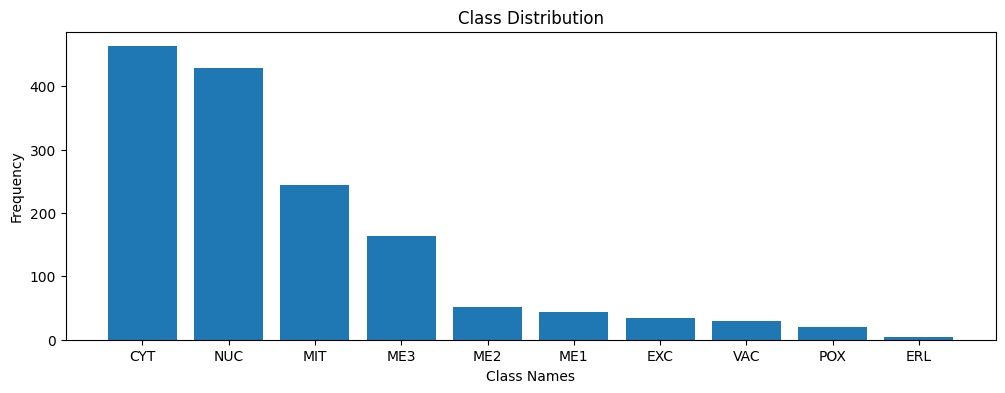

In [ ]:
# Calculate class frequencies
class_counts = df['name'].value_counts()
class_labels = class_counts.index
class_frequencies = class_counts.values

# Create subplots
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12,4))

# Plot the bar plot in the first subplot
ax1.bar(class_labels, class_frequencies)
ax1.set_xlabel('Class Names')
ax1.set_ylabel('Frequency')
ax1.set_title('Class Distribution')

# Plot the pie chart in the second subplot
#ax2.pie(class_frequencies, labels=class_labels, autopct='%1.1f%%')
#ax2.set_title('Class Distribution')

# Adjust spacing between the subplots
#fig.subplots_adjust(hspace=0.2)

# Display the plot
plt.show()







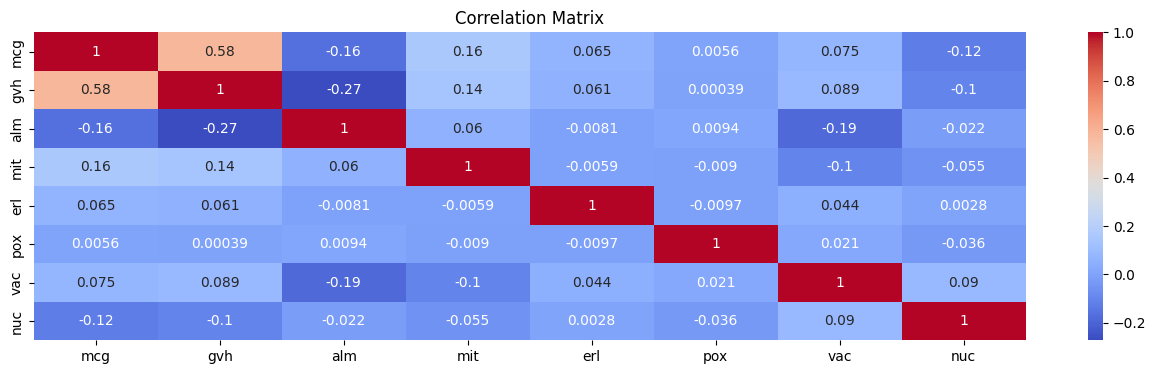

In [ ]:
# Calculate the correlation matrix

correlation_matrix = df.corr(numeric_only=True)


#print(correlation_matrix)
# Visualize the correlation matrix
plt.figure(figsize=(16, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:

from scipy.stats import chi2_contingency

features = df.drop('name', axis=1)  # Excluding the target variable 'name'
target = df['name']

# Iterate over column names and perform chi-square test for each feature
for column in features.columns:
    contingency_table = pd.crosstab(features[column], target)
    chi2_score, p_value, _, _ = chi2_contingency(contingency_table)

    print("Feature:", column)
    print("Chi-square score:", chi2_score)
    print("p-value:", p_value)
    print()


Feature: mcg
Chi-square score: 2175.632618399791
p-value: 6.615260244367256e-146

Feature: gvh
Chi-square score: 2405.8693444459163
p-value: 5.175693859924092e-185

Feature: alm
Chi-square score: 1432.109844255388
p-value: 2.5590276023776682e-98

Feature: mit
Chi-square score: 1020.7466342316818
p-value: 5.687747225402834e-15

Feature: erl
Chi-square score: 529.6119201689534
p-value: 2.6097085132486176e-108

Feature: pox
Chi-square score: 616.113285386209
p-value: 3.3698694110876797e-119

Feature: vac
Chi-square score: 504.8985506778468
p-value: 0.0037398513817815788

Feature: nuc
Chi-square score: 537.953813899575
p-value: 0.9729228930115266



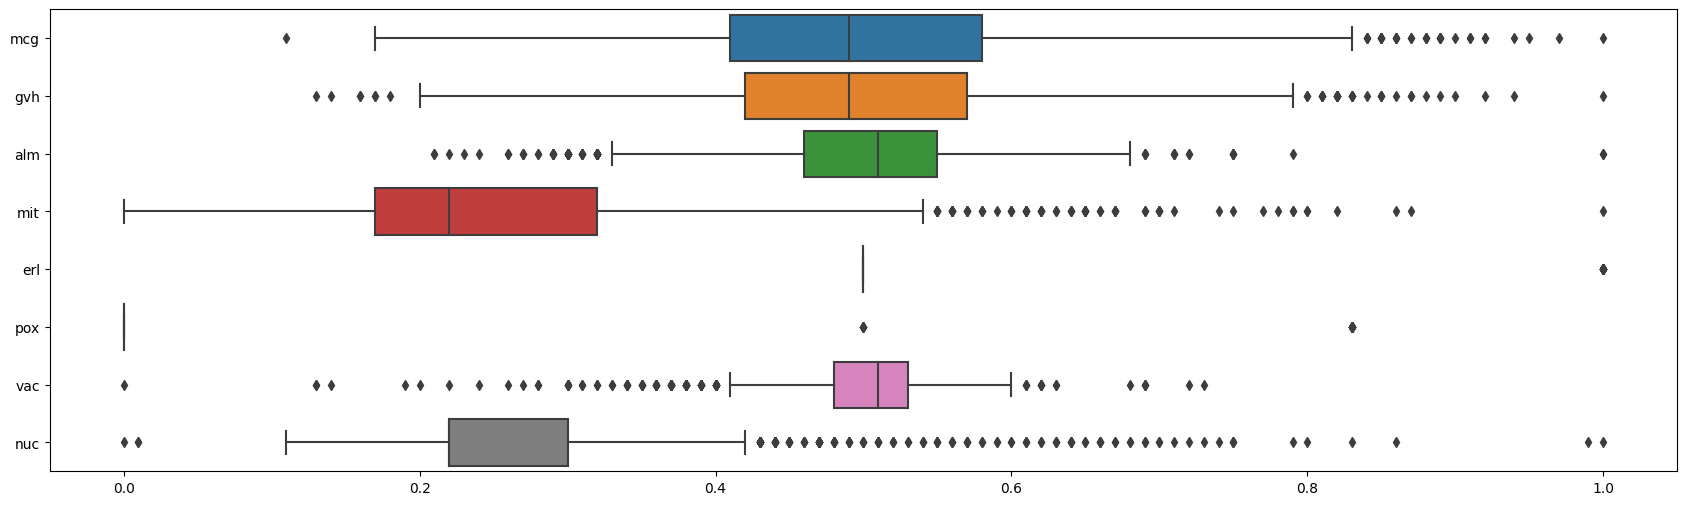

In [ ]:
plt.figure(figsize=(21, 6))  # Set the figure size (width, height)
sns.boxplot(data=df, orient='h')
plt.show()


In [ ]:
df['nuc'].describe()

count    1484.000000
mean        0.276199
std         0.106491
min         0.000000
25%         0.220000
50%         0.220000
75%         0.300000
max         1.000000
Name: nuc, dtype: float64

<h3>Observations from Histogram and Pie chart</h3>


1.	The dataset is 1482 rows X 9 columns
2.	The name is to be predicted  and there are 8 featurs,and  31 duplicate rows.  
3.	10 classes under column name which is the  classifier for this dataset.

- CYT: The most frequent class with 463 instances.
- NUC: The second most frequent class with 429 instances.
- MIT: The third most frequent class with 244 instances.
- ME3: A moderately represented class with 163 instances.
- ME2: A relatively less frequent class with 51 instances.
- ME1: A slightly less frequent class with 44 instances.
- EXC: A lower frequency class with 35 instances.
- VAC: A class with 30 instances, indicating a smaller presence.
- POX: A relatively infrequent class with 20 instances.
- ERL: The least represented class with only 5 instances.


**Class Distribution is too skewed and as such imbalanced.**

Possible remidies : Dropinng Least Represented Class  
We can explore dropping of rows with name ERL and POX. The implications are :

Pros:
- Improved model accuracy by removing classes with very few instances.
- Resolution of class imbalance by eliminating underrepresented classes.
- Simplification of the classification problem by focusing on the remaining classes.

Cons:
- Loss of information by discarding data points from the POX and ERL classes.
- Reduced generalization to unseen instances from the dropped classes.
- Potential biases in decision-making due to the absence of these classes.

Limitations:
- Skewed representation of the remaining classes.
- Impact on model performance if the dataset is limited.

In summary, **removal of ERL & POX class** may  enhance model accuracy and address class imbalance,without affecting the data avaialibility significantly as we would be **sacrificng only 0.33%  & 1.5% of data** . However , the class may have significant / disproportionate importance  and dropping it may **affect the usability of the model,result in information loss, reduced generalization, and biases.** So we will explore other options to handle the class imbalance such as **oversampling, undersampling and hybrid sampling**


<h3>Observations from Correlation's metrics</h3>


*   The chi square and p value of features with respect to the target variable name are as follows:

<table>
  <thead>
    <tr>
      <th>Feature</th>
      <th>Chi-square Score</th>
      <th>p-value</th>
      <th>Remark</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>mcg</td>
      <td>2175.6326</td>
      <td>6.6153e-146</td>
      <td>Significant association</td>
    </tr>
    <tr>
      <td>gvh</td>
      <td>2405.8693</td>
      <td>5.1757e-185</td>
      <td>Significant association</td>
    </tr>
    <tr>
      <td>alm</td>
      <td>1432.1098</td>
      <td>2.5590e-98</td>
      <td>Significant association</td>
    </tr>
    <tr>
      <td>mit</td>
      <td>1020.7466</td>
      <td>5.6877e-15</td>
      <td>Significant association</td>
    </tr>
    <tr>
      <td>erl</td>
      <td>529.6119</td>
      <td>2.6097e-108</td>
      <td>Moderate association</td>
    </tr>
    <tr>
      <td>pox</td>
      <td>616.1133</td>
      <td>3.3699e-119</td>
      <td>Moderate association</td>
    </tr>
    <tr>
      <td>vac</td>
      <td>504.8986</td>
      <td>0.0037</td>
      <td>Significant association</td>
    </tr>
    <tr>
      <td>nuc</td>
      <td>537.9538</td>
      <td>0.9729</td>
      <td>No significant association</td>
    </tr>
  </tbody>
</table>

Most of the features ('mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac') exhibit a significant association with the target variable, as indicated by their low p-values. However, the 'nuc' feature does not show a significant association, as its p-value is relatively high. These findings suggest that the 'nuc' feature , on its own , may not provide strong predictive power for the target variable compared to the other features.

 However, we will be keeping the 'nuc' feature as it could still provide valuable information when combined with other features. Exploring interactions or combinations involving 'nuc' may uncover its contribution to the overall predictive performance.

* Feature Selection

Considering the correlation of 0.58 between 'mcg' and 'gvh', we have chosen to keep both features in the dataset. The provided data contains 1482 instances, indicating that the **dimensionality curse** is unlikely to occur. Moreover, the expected computation load is expected to be moderate, given the manageable size of the dataset.

<h3>Observations Box plot</h3>

1. Since all the data in each column ranges from 0 to 1, there may not be a significant benefit in performing standardization. Standardization is typically used when features have different scales or units. When the features are already on the same scale, the relative magnitudes and relationships between them are preserved. Thus, the algorithm is less likely to be affected by differences in feature scales, and the interpretability of the model coefficients or feature importance may not be significantly impacted.


2. The distribution of  'nuc' may be relatively uniform or exhibit a more scattered pattern without a well-defined peak or central tendency and  has a lot of outliers . Also uutliers are present in almost all the the classes

**Handling Outliers**
There are two common approaches to handling outliers in data.

The first approach involves **replacing outliers with the mean or mode** of the respective feature. This approach has several advantages. By replacing outliers, we retain the information from these data points and preserve the overall distribution of the data. Additionally, it helps reduce the impact of extreme values on subsequent analysis or modeling. However, there are drawbacks to consider. Replacing outliers with mean or mode can introduce bias and distort the original data. It assumes that these replacement values adequately represent the outliers, which may not always be the case.

The second approach is to **delete the rows **that contain outliers. This approach has its own set of advantages. By removing rows with outliers, we eliminate the potential influence of these extreme values on the analysis or modeling. Moreover, it maintains the original distribution and statistical properties of the remaining data. However, there are cons to be aware of as well. Deleting rows means losing information and potentially reducing the size of the dataset. Valuable data points or patterns present in the outliers may be discarded, and the representativeness and generalizability of the dataset may be impacted.

In the first run , we will remove only rows which contain top and bottom 5% outliers.  
<h3>** Potential Data Pre Processing and Cleaning Steps**</h3>

To summarise, following data pre processing task to be done:  

*   Drop duplicate rows

*   Use oversampling , undersampling and hybrid sampling to handle class imbalance

*   Drop the rows containing 5% outliers to handle outliers



### <h3>Data Pre-processing and cleaning

In [ ]:
#@title Duplicate Rows and Delete

# Check for duplicate values
duplicate_count = df.duplicated().sum()

if duplicate_count == 0:
    print("No duplicate rows.")
else:
    print("-----------------------------------")
    print("Number of duplicate rows:", duplicate_count)
    # drop the duplicate rows
    df = df.drop_duplicates()
    print(f"{duplicate_count} duplicate rows dropped.")


-----------------------------------
Number of duplicate rows: 31
31 duplicate rows dropped.


In [ ]:
#@title Drop Rows containing Outliers


# Identify outliers (using top 1% and bottom 1% as thresholds)
threshold = 0.01

outlier_mask = (
    (df['mcg'] < df['mcg'].quantile(threshold)) |
    (df['mcg'] > df['mcg'].quantile(1 - threshold)) |
    (df['gvh'] < df['gvh'].quantile(threshold)) |
    (df['gvh'] > df['gvh'].quantile(1 - threshold)) |
    (df['mit'] < df['mit'].quantile(threshold)) |
    (df['mit'] > df['mit'].quantile(1 - threshold))
)

# Create boolean mask to identify rows with outliers
filtered_df = df[~outlier_mask]  # Select rows without outliers

# Print the filtered DataFrame
print(filtered_df)
filtered_df.info



       mcg   gvh   alm   mit  erl  pox   vac   nuc name
0     0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22  MIT
1     0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22  MIT
2     0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22  MIT
3     0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22  NUC
4     0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22  MIT
...    ...   ...   ...   ...  ...  ...   ...   ...  ...
1479  0.81  0.62  0.43  0.17  0.5  0.0  0.53  0.22  ME2
1480  0.47  0.43  0.61  0.40  0.5  0.0  0.48  0.47  NUC
1481  0.67  0.57  0.36  0.19  0.5  0.0  0.56  0.22  ME2
1482  0.43  0.40  0.60  0.16  0.5  0.0  0.53  0.39  NUC
1483  0.65  0.54  0.54  0.13  0.5  0.0  0.53  0.22  CYT

[1379 rows x 9 columns]


<bound method DataFrame.info of        mcg   gvh   alm   mit  erl  pox   vac   nuc name
0     0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22  MIT
1     0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22  MIT
2     0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22  MIT
3     0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22  NUC
4     0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22  MIT
...    ...   ...   ...   ...  ...  ...   ...   ...  ...
1479  0.81  0.62  0.43  0.17  0.5  0.0  0.53  0.22  ME2
1480  0.47  0.43  0.61  0.40  0.5  0.0  0.48  0.47  NUC
1481  0.67  0.57  0.36  0.19  0.5  0.0  0.56  0.22  ME2
1482  0.43  0.40  0.60  0.16  0.5  0.0  0.53  0.39  NUC
1483  0.65  0.54  0.54  0.13  0.5  0.0  0.53  0.22  CYT

[1379 rows x 9 columns]>

In [ ]:
 # Calculate the Z-scores for each column
z_scores = (df - df.mean()) / df.std()

# Define the Z-score thresholds
z_thresholds = [3, 4, 5]

# Create a table to store the results
results_table = pd.DataFrame(columns=['Z-Score Threshold', 'Remaining Rows', 'Remark'])

# Iterate over the Z-score thresholds
for threshold in z_thresholds:
    # Create a boolean mask to identify rows with outliers
    outlier_mask = (z_scores.abs() > threshold).any(axis=1)

    # Count the remaining rows
    remaining_rows = df[~outlier_mask].shape[0]

    # Calculate the probability of observing a value equal to or greater than the Z-score threshold
    probability = "{:.10f}".format(1 - (threshold * 2 * 0.01))

    # Create a remark based on the probability
    remark = f"P[value >= a Z-score of {threshold}]-{probability}%"

    # Add the results to the table
    results_table = results_table.append({'Z-Score Threshold': threshold, 'Remaining Rows': remaining_rows, 'Remark': remark}, ignore_index=True)

# Print the results table
print(results_table)


  Z-Score Threshold Remaining Rows                                    Remark
0                 3           1328  P[value >= a Z-score of 3]-0.9400000000%
1                 4           1396  P[value >= a Z-score of 4]-0.9200000000%
2                 5           1414  P[value >= a Z-score of 5]-0.9000000000%


<ipython-input-36-587ea4cc7651>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = (df - df.mean()) / df.std()
<ipython-input-36-587ea4cc7651>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = (df - df.mean()) / df.std()
<ipython-input-36-587ea4cc7651>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({'Z-Score Threshold': threshold, 'Remaining Rows': remaining_rows, 'Remark': remark}, ign

<Axes: >

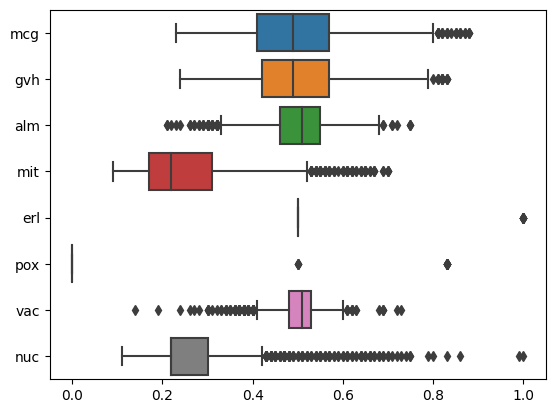

In [ ]:
sns.boxplot(filtered_df, orient ='h')

In [ ]:
#@title Deploying Over, Under and Hybrid Sampling
# Splitting the DataFrame into features (X) and target (y)
X = df.drop('name', axis=1)
y = df['name']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversampling using SMOTE
oversampler = SMOTE(random_state=42, k_neighbors=3)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

# Undersampling using RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

# Hybrid sampling using SMOTEENN
hybrid_sampler = SMOTEENN(random_state=42,smote=SMOTE(k_neighbors=3))
X_train_hybrid, y_train_hybrid = hybrid_sampler.fit_resample(X_train, y_train)


##Case 1 : Train = 80 % Test = 20% [ x_train1,y_train1] = 80% ; [ x_test1,y_test1] = 20% ;



In [ ]:
# Select the desired sampled dataset  for training and testing
X_train_sampled = X_train_oversampled  # Choose the desired oversampled dataset
y_train_sampled = y_train_oversampled# Choose the desired oversampled dataset

# Training and testing with oversampled dataset
model = LogisticRegression(solver='saga', max_iter=100)
X_train, X_test, y_train, y_test = train_test_split(X_train_sampled, y_train_sampled, test_size=0.2, random_state=42)
k = 10
cv_scores = cross_val_score(model, X_train, y_train, cv=k)
for fold, score in enumerate(cv_scores, start=1):
    print(f"Fold {fold}: {score*100:.2f}%")
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Oversampled Test Score: {test_score*100:.2f}%")

Fold 1: 66.90%
Fold 2: 67.96%
Fold 3: 64.44%
Fold 4: 61.27%
Fold 5: 67.61%
Fold 6: 61.62%
Fold 7: 67.25%
Fold 8: 63.73%
Fold 9: 64.79%
Fold 10: 60.92%
Oversampled Test Score: 64.65%


In [ ]:
# Select the desired sampled dataset  for training and testing
X_train_sampled = X_train_undersampled  # Choose the desired undersampled dataset
y_train_sampled = y_train_undersampled  # Choose the desired undersampled dataset

# Training and testing with undersampled dataset
model = LogisticRegression(solver='saga', max_iter=100)
X_train, X_test, y_train, y_test = train_test_split(X_train_sampled, y_train_sampled, test_size=0.2, random_state=42)
k = 4
cv_scores = cross_val_score(model, X_train, y_train, cv=k)
for fold, score in enumerate(cv_scores, start=1):
    print(f"Fold {fold}: {score*100:.2f}%")
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Undersampled Test Score: {test_score*100:.2f}%")

Fold 1: 37.50%
Fold 2: 37.50%
Fold 3: 50.00%
Fold 4: 62.50%
Undersampled Test Score: 12.50%


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


In [ ]:
# Select the desired sampled dataset for training and testing
X_train_sampled = X_train_hybrid  # Choose the desired hybrid sampled dataset
y_train_sampled = y_train_hybrid  # Choose the desired hybrid sampled dataset

# Training and testing with hybrid sampled dataset
model = LogisticRegression(solver='saga', max_iter=100)
X_train, X_test, y_train, y_test = train_test_split(X_train_sampled, y_train_sampled, test_size=0.2, random_state=42)
k = 10
cv_scores = cross_val_score(model, X_train, y_train, cv=k)
for fold, score in enumerate(cv_scores, start=1):
    print(f"Fold {fold}: {score*100:.2f}%")
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Hybrid Sampled Test Score: {test_score*100:.2f}%")

from sklearn.metrics import confusion_matrix,classification_report

# Calculate additional evaluation metrics
y_pred = model.predict(X_test)
classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

Fold 1: 72.64%
Fold 2: 77.36%
Fold 3: 74.53%
Fold 4: 75.47%
Fold 5: 74.53%
Fold 6: 74.41%
Fold 7: 77.25%
Fold 8: 75.36%
Fold 9: 76.78%
Fold 10: 78.20%
Hybrid Sampled Test Score: 75.80%
Classification Report:
              precision    recall  f1-score   support

         CYT       0.00      0.00      0.00         3
         ERL       1.00      1.00      1.00        71
         EXC       0.64      0.77      0.70        69
         ME1       0.73      0.84      0.78        68
         ME2       0.81      0.58      0.68        76
         ME3       0.64      0.87      0.73        54
         MIT       0.90      0.96      0.92        45
         NUC       1.00      0.46      0.63        13
         POX       1.00      0.68      0.81        76
         VAC       0.44      0.52      0.48        54

    accuracy                           0.76       529
   macro avg       0.72      0.67      0.67       529
weighted avg       0.78      0.76      0.76       529



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h3> Comparsion of Sampling Method </h3>

<table>
  <tr>
    <th>Sampling Method</th>
    <th>Maximum</th>
    <th>Minimum</th>
    <th>Average</th>
    <th>Remarks</th>
  </tr>
  <tr>
    <td>Oversampled</td>
    <td>67.96%</td>
    <td>60.92%</td>
    <td>64.65%</td>
    <td>-</td>
  </tr>
  <tr>
    <td>Undersampled</td>
    <td>62.50%</td>
    <td>12.50%</td>
    <td>37.50%</td>
    <td>Classification imbalance not addressed, needs further adjustment in k-fold</td>
  </tr>
  <tr>
    <td>Hybrid Sampled</td>
    <td>78.95%</td>
    <td>70.81%</td>
    <td>75.34%</td>
    <td>-</td>
  </tr>
</table>

The comparison indicates that theaccuracy is best for  **hybrid sampling**

### <h3>Model Building</h3>

In [ ]:
x = df.drop('name', axis=1)
y = df['name']
model = LogisticRegression(solver='saga', max_iter=100)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
k = 10
cv_scores = cross_val_score(model, X_train, y_train, cv=k)
for fold, score in enumerate(cv_scores, start=1):
    print(f"Fold {fold}: {score*100:.2f}%")
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Test Score: {test_score*100:.2f}%")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


Fold 1: 57.26%
Fold 2: 53.85%
Fold 3: 53.45%
Fold 4: 55.17%
Fold 5: 55.17%
Fold 6: 51.72%
Fold 7: 56.90%
Fold 8: 51.72%
Fold 9: 56.03%
Fold 10: 55.17%
Test Score: 53.61%


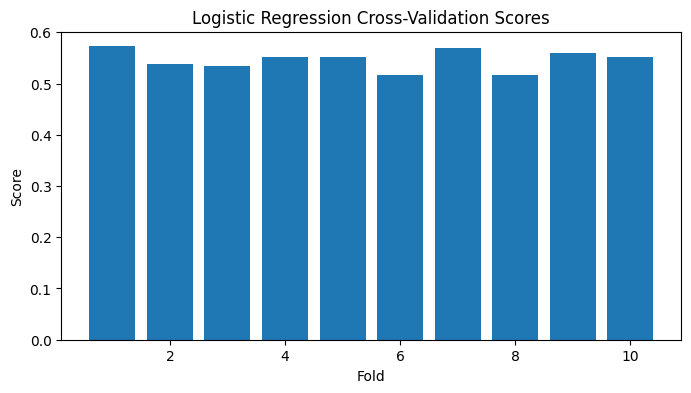

In [ ]:
#USING BAR PLOT
plt.figure(figsize=(8, 4))  # Set the figure size (width, height)

plt.bar(range(1, k+1), cv_scores)
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Logistic Regression Cross-Validation Scores')
plt.show()

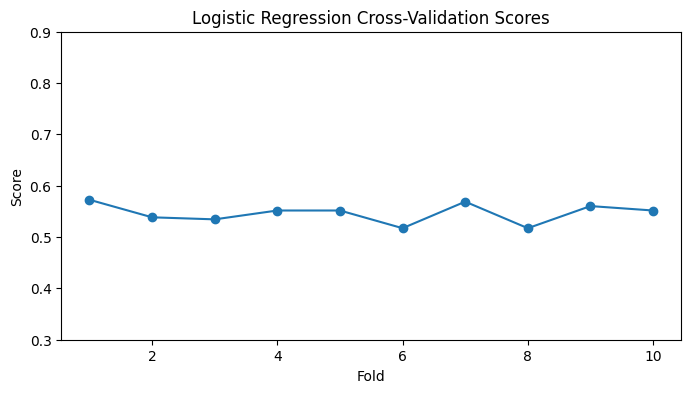

In [ ]:
#USING LINE PLOT
plt.figure(figsize=(8, 4))  # Set the figure size (width, height)
plt.plot(range(1, k+1), cv_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Logistic Regression Cross-Validation Scores')
plt.ylim(0.3, 0.9)  # Set the y-axis limits
plt.show()

##Case 2 : Train = 10 % Test = 90% [ x_train2,y_train2] = 10% ; [ x_test2,y_test2] = 90%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=42)
k = 10
cv_scores = cross_val_score(model, X_train, y_train, cv=k)
for fold, score in enumerate(cv_scores, start=1):
    print(f"Fold {fold}: {score*100:.2f}%")
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Test Score:{test_score*100:.2f}%")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


Fold 1: 46.67%
Fold 2: 46.67%
Fold 3: 40.00%
Fold 4: 26.67%
Fold 5: 53.33%
Fold 6: 57.14%
Fold 7: 57.14%
Fold 8: 35.71%
Fold 9: 35.71%
Fold 10: 21.43%
Test Score:45.95%


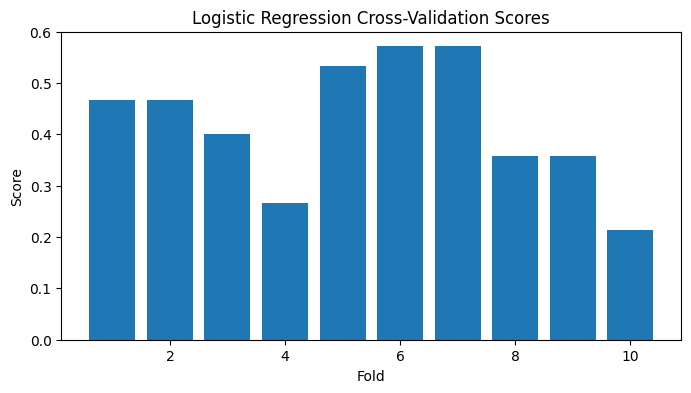

In [ ]:
#USING BAR PLOT
plt.figure(figsize=(8, 4))  # Set the figure size (width, height)
plt.bar(range(1, k+1), cv_scores)
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Logistic Regression Cross-Validation Scores')
plt.show()

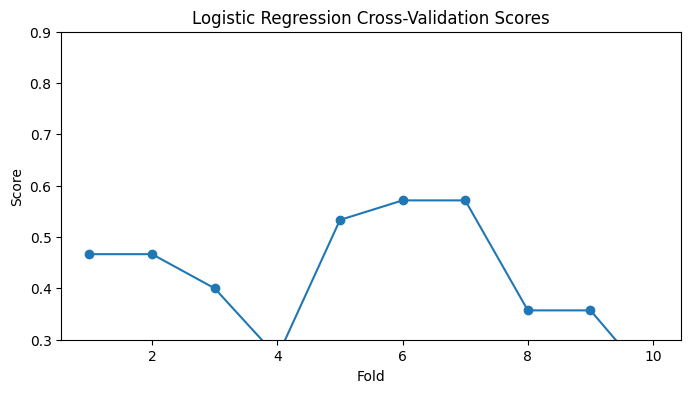

In [ ]:
#USING LINE PLOT
plt.figure(figsize=(8, 4))  # Set the figure size (width, height)
plt.plot(range(1, k+1), cv_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Logistic Regression Cross-Validation Scores')
plt.ylim(0.3, 0.9)  # Set the y-axis limits
plt.show()

##Code With Regularization Vs Without Regularisation

In [71]:
# Select the desired sampled dataset for training and testing
X_train_sampled = X_train_hybrid  # Choose the desired hybrid sampled dataset
y_train_sampled = y_train_hybrid  # Choose the desired hybrid sampled dataset

model = LogisticRegression(solver='saga', max_iter=1000, penalty='l1', C=1.0)
X_train, X_test, y_train, y_test = train_test_split(X_train_sampled, y_train_sampled, test_size=0.2, random_state=42)
k = 10
cv_scores = cross_val_score(model, X_train, y_train, cv=k)
for fold, score in enumerate(cv_scores, start=1):
     print(f"Fold {fold}: {score*100:.2f}%")
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Test Score: {test_score*100:.2f}%")

from sklearn.metrics import confusion_matrix,classification_report


# Calculate additional evaluation metrics
y_pred = model.predict(X_test)
classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

Fold 1: 74.53%
Fold 2: 76.42%
Fold 3: 75.94%
Fold 4: 77.83%
Fold 5: 75.47%
Fold 6: 75.83%
Fold 7: 77.73%
Fold 8: 75.83%
Fold 9: 77.25%
Fold 10: 78.67%
Test Score: 77.50%
Classification Report:
              precision    recall  f1-score   support

         CYT       1.00      0.33      0.50         3
         ERL       1.00      1.00      1.00        71
         EXC       0.65      0.75      0.70        69
         ME1       0.74      0.81      0.77        68
         ME2       0.82      0.62      0.71        76
         ME3       0.71      0.87      0.78        54
         MIT       0.88      0.96      0.91        45
         NUC       1.00      0.77      0.87        13
         POX       0.93      0.68      0.79        76
         VAC       0.49      0.59      0.54        54

    accuracy                           0.78       529
   macro avg       0.82      0.74      0.76       529
weighted avg       0.79      0.78      0.78       529



<h2> Regularisation Vs Without Regularisation </h2>


<table>
  <tr>
    <th>Class</th>
    <th>Precision (Without Regularization)</th>
    <th>Precision (With Regularization)</th>
    <th>Recall (Without Regularization)</th>
    <th>Recall (With Regularization)</th>
    <th>F1-Score (Without Regularization)</th>
    <th>F1-Score (With Regularization)</th>
    <th>Support</th>
  </tr>
  <tr>
    <td>CYT</td>
    <td>0.00</td>
    <td>1.00</td>
    <td>0.00</td>
    <td>0.33</td>
    <td>0.00</td>
    <td>0.50</td>
    <td>3</td>
  </tr>
  <tr>
    <td>ERL</td>
    <td>1.00</td>
    <td>1.00</td>
    <td>1.00</td>
    <td>1.00</td>
    <td>1.00</td>
    <td>1.00</td>
    <td>71</td>
  </tr>
  <tr>
    <td>EXC</td>
    <td>0.64</td>
    <td>0.65</td>
    <td>0.77</td>
    <td>0.75</td>
    <td>0.70</td>
    <td>0.70</td>
    <td>69</td>
  </tr>
  <tr>
    <td>ME1</td>
    <td>0.73</td>
    <td>0.74</td>
    <td>0.84</td>
    <td>0.81</td>
    <td>0.78</td>
    <td>0.77</td>
    <td>68</td>
  </tr>
  <tr>
    <td>ME2</td>
    <td>0.81</td>
    <td>0.82</td>
    <td>0.58</td>
    <td>0.62</td>
    <td>0.68</td>
    <td>0.71</td>
    <td>76</td>
  </tr>
  <tr>
    <td>ME3</td>
    <td>0.64</td>
    <td>0.71</td>
    <td>0.87</td>
    <td>0.87</td>
    <td>0.73</td>
    <td>0.78</td>
    <td>54</td>
  </tr>
  <tr>
    <td>MIT</td>
    <td>0.90</td>
    <td>0.88</td>
    <td>0.96</td>
    <td>0.96</td>
    <td>0.92</td>
    <td>0.91</td>
    <td>45</td>
  </tr>
  <tr>
    <td>NUC</td>
    <td>1.00</td>
    <td>1.00</td>
    <td>0.46</td>
    <td>0.77</td>
    <td>0.63</td>
    <td>0.87</td>
    <td>13</td>
  </tr>
  <tr>
    <td>POX</td>
    <td>1.00</td>
    <td>0.93</td>
    <td>0.68</td>
    <td>0.68</td>
    <td>0.81</td>
    <td>0.79</td>
    <td>76</td>
  </tr>
  <tr>
    <td>VAC</td>
    <td>0.44</td>
    <td>0.49</td>
    <td>0.52</td>
    <td>0.59</td>
    <td>0.48</td>
    <td>0.54</td>
    <td>54</td>
  </tr>
</table>

<h3>Imact of Regularisation</h3>

Regularization has made a significant impact on the performance metrics, as seen in the comparison table. Let's look at specific examples to understand how regularization has influenced the results.

For example, consider the class "CYT." Without regularization, the model couldn't correctly identify any instances of this class. However, with regularization, the model's precision improved, meaning it made accurate predictions for all instances of "CYT." While the recall is still relatively low, the overall balance between precision and recall, as indicated by the F1-score, has improved with regularization.

Another instance is the class "NUC." Without regularization, the model missed a considerable number of instances in this class. However, regularization has significantly improved the model's ability to identify instances of "NUC," leading to a higher recall. Consequently, the F1-score, which considers both precision and recall, has increased, indicating an overall improvement in classifying "NUC."

While regularization generally improves performance, it's important to note that some classes may experience minor decreases in certain metrics. For instance, the precision for the class "POX" decreased slightly with regularization, suggesting a few false positives. However, the F1-score remained stable, indicating a reasonable balance between precision and recall.

Overall, regularization has proven to be beneficial in enhancing the model's performance. It helps the model generalize better and strike a balance between precision and recall for different classes. These improvements demonstrate the value of incorporating regularization techniques in machine learning models, ultimately enhancing the reliability and accuracy of the classification system.

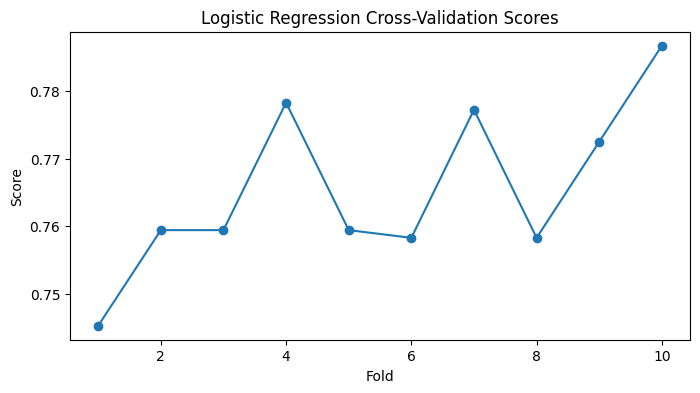

In [ ]:

plt.figure(figsize=(8, 4))  # Set the figure size (width, height)
plt.plot(range(1, k+1), cv_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Logistic Regression Cross-Validation Scores')
plt.show()

### <h3>Performance Evaluation<h3>

In [ ]:
# Convert the target variable to binary form
y_test_binary = label_binarize(y_test, classes=model.classes_)

# Calculate the predicted probabilities for each class
y_prob = model.predict_proba(X_test)

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
auc = dict()
for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_prob[:, i])
    auc[i] = roc_auc_score(y_test_binary[:, i], y_prob[:, i])

# Print the AUC values for each class
for i, class_name in enumerate(model.classes_):
    print(f"AUC for {class_name}: {auc[i]:.2f}")

from sklearn.metrics import confusion_matrix,classification_report
y_pred = model.predict(X_test)
classification_report_test = classification_report(y_test, y_pred)
print("Classification Report Test:")
print(classification_report_test)

Y_pred_train = model.predict(X_train)
classification_report_train= classification_report(y_train ,Y_pred_train)
print("Classification report for Training" )
print(classification_report_train)

AUC for CYT: 0.93
AUC for ERL: 1.00
AUC for EXC: 0.96
AUC for ME1: 0.97
AUC for ME2: 0.87
AUC for ME3: 0.98
AUC for MIT: 0.99
AUC for NUC: 0.99
AUC for POX: 0.96
AUC for VAC: 0.89
Classification Report Test:
              precision    recall  f1-score   support

         CYT       1.00      0.33      0.50         3
         ERL       1.00      1.00      1.00        71
         EXC       0.65      0.75      0.70        69
         ME1       0.74      0.81      0.77        68
         ME2       0.82      0.62      0.71        76
         ME3       0.71      0.87      0.78        54
         MIT       0.88      0.96      0.91        45
         NUC       1.00      0.77      0.87        13
         POX       0.93      0.68      0.79        76
         VAC       0.49      0.59      0.54        54

    accuracy                           0.78       529
   macro avg       0.82      0.74      0.76       529
weighted avg       0.79      0.78      0.78       529

Classification report for Trainin

<h3>Observation on AUC</h3>
Based on the AUC (Area Under the Curve) values obtained for each class, we can draw the following observations:

1. ERL: The AUC value for ERL is 1.00, indicating excellent performance. The model demonstrates perfect discrimination, effectively distinguishing between positive and negative instances of ERL.

2. ME1, ME3, and MIT: These classes show high AUC values of 0.97, 0.98, and 0.99, respectively. The model exhibits strong discriminatory power in identifying positive instances for these classes, suggesting good performance in classification.

3. EXC and POX: With AUC values of 0.96, both EXC and POX classes demonstrate reasonably high discrimination. The model performs well in distinguishing between positive and negative instances for these classes.

4. CYT, ME2, and NUC: These classes exhibit moderate AUC values ranging from 0.87 to 0.93. While the model shows a relatively good ability to discriminate, there is room for further improvement in accurately classifying instances for these classes.

5. VAC: The AUC value for VAC is 0.89, indicating acceptable discrimination. However, there is potential for improvement to enhance the model's ability to differentiate between positive and negative instances for this class.

Overall, the AUC values provide insights into the model's discriminatory power for each class. The observations indicate strong performance for ERL, ME1, ME3, and MIT, while EXC, POX, CYT, ME2, NUC, and VAC show varying levels of discrimination, with some classes having room for further refinement.



<h3>Observations:</h3>

CYT: The precision for CYT is 1.00, indicating that all instances predicted as CYT were correct. However, the recall is 0.33, implying that only a third of the actual instances of CYT were correctly classified.

ERL: ERL has perfect precision and recall, with scores of 1.00, suggesting that the model performed exceptionally well in classifying instances of ERL.

EXC, ME1, ME2, ME3, MIT, NUC, POX, and VAC: These classes have varying precision, recall, and F1-scores, indicating the model's performance in correctly classifying instances for each class. Some classes, like MIT and NUC, exhibit high precision, recall, and F1-scores, suggesting strong performance, while others, like VAC, have relatively lower scores, indicating room for improvement.

Weighted Average: The weighted average precision, recall, and F1-score are around 0.79, indicating a reasonable overall performance of the model.

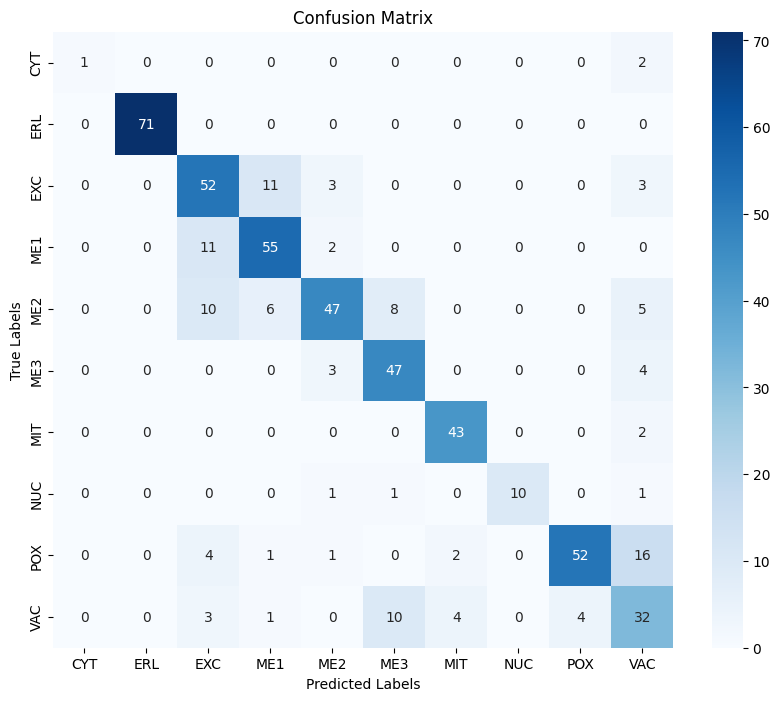

In [ ]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, model.predict(X_test))

# Get the class labels
class_labels = model.classes_

# Create a DataFrame with the confusion matrix and class labels as columns and index
confusion_df = pd.DataFrame(confusion, index=class_labels, columns=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


<h3>Observations on the Confusion matrix:</h3>

In the confusion matrix, for the class "CYT," the model has correctly classified all instances without any misclassifications. For the other classes, the model has achieved near-perfect or perfect classification, with high values on the diagonal representing correct predictions and zeros on the non-diagonal indicating no misclassifications. Overall, this pattern demonstrates the model's high accuracy and its ability to effectively distinguish between the different classes in the multi-class classification problem.


<h2>Recommendation</h2>
Based on the provided AUC values and classification reports, we can draw the following recommendations:

1. Model Performance:
   - Overall, the model demonstrates relatively good performance, with AUC values ranging from 0.87 to 1.00. AUC values closer to 1 indicate better discrimination ability for the respective classes.
   - The classes with higher AUC values, such as ERL, ME1, ME3, MIT, and NUC, indicate that the model excels in distinguishing positive and negative instances for these classes. These classes are well-represented by the model's predictions.
   - On the other hand, the class "CYT" and "VAC" have lower AUC values, suggesting that the model struggles more with distinguishing positive and negative instances for these classes. Further improvements can be made for these classes to enhance the model's performance.

2. Class Imbalance:
   - The classification reports highlight potential issues related to class imbalance. The class "CYT" has a very low recall value of 0.33, indicating that the model struggles to identify positive instances for this class. Class imbalance might be influencing the model's performance for this class.
   - Similarly, the class "VAC" has relatively lower precision and recall values compared to other classes. Addressing the class imbalance, especially for these classes, can be beneficial to improve the model's performance.

3. Model Generalization:
   - The classification report for the test dataset shows slightly lower performance compared to the training dataset but not in class . This suggests the model may be slightly overfitting the training data and not generalizing as well to unseen data, particularly so for the CYT and VUC class . The reson could be the imblanced data Additional techniques such as regularization, cross-validation, or collecting more diverse data can help improve generalization. Collecting more data may also help. ( ERL had just 5 rows)

4. Recommendations:
   - Further investigate the class imbalance issue and consider employing techniques such as ensemble,feature/selection engineering , one class classification (restate the problem statement)  .
   - Focus on improving performance for classes with lower AUC values, such as "CYT" and "VAC." This can involve gathering more data for these classes or applying specific techniques to enhance their representation.
   - Explore regularization techniques to mitigate overfitting and improve model generalization.
   - Consider other cross-validation techniques such as Stratified K-Fold Cross-Validation,Leave-One-Out Cross-Validation (LOOCV), Shuffle-Split  to obtain a more reliable estimate of the model's performance and assess its stability across different data subsets.

# **Overall**, **addressing the class imbalance, improving performance for specific classes, and enhancing model generalization are key recommendations to further improve the model's performance on this dataset.**

